In [ ]:
!pip install pandas numpy matplotlib seaborn nltk wordcloud scikit-learn joblib tabulate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from joblib import Parallel, delayed
from tabulate import tabulate

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vibha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vibha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv("Reviews.csv")
df = df[['Text', 'Score']].dropna()
df = df[df['Score'] != 3]  # Remove neutral reviews
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

# Balance dataset to avoid bias
positive_df = df[df['Sentiment'] == 1]
negative_df = df[df['Sentiment'] == 0]
min_len = min(len(positive_df), len(negative_df))
df_balanced = pd.concat([
    positive_df.sample(min_len, random_state=42),
    negative_df.sample(min_len, random_state=42)
])

In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    words = text.split()
    return " ".join([word for word in words if word not in stop_words])

# Clean text using parallel processing
df_balanced['Cleaned_Text'] = Parallel(n_jobs=-1)(delayed(clean_text)(text) for text in df_balanced['Text'])

In [ ]:

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_balanced['Cleaned_Text'])
y = df_balanced['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.2f}")




✅ Model Accuracy: 0.88


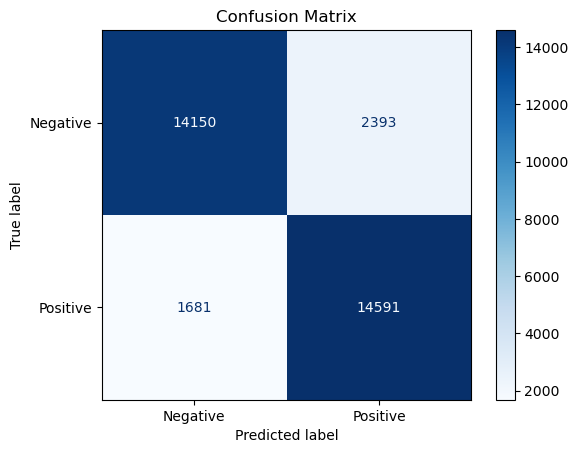

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

C:\Users\vibha\AppData\Local\Temp\ipykernel_20092\2779441525.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced, x='Sentiment', palette='coolwarm')


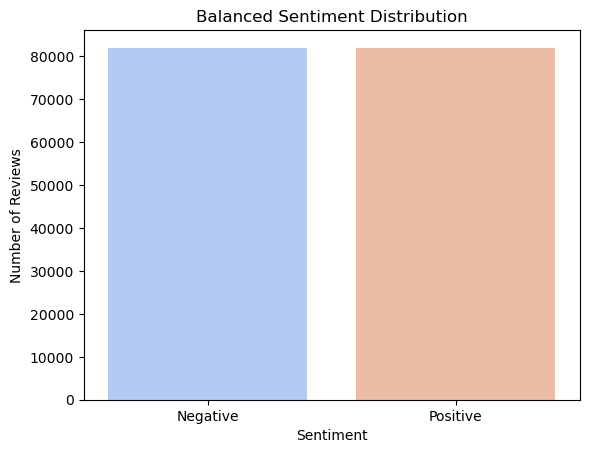

In [ ]:
sns.countplot(data=df_balanced, x='Sentiment', palette='coolwarm')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title("Balanced Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

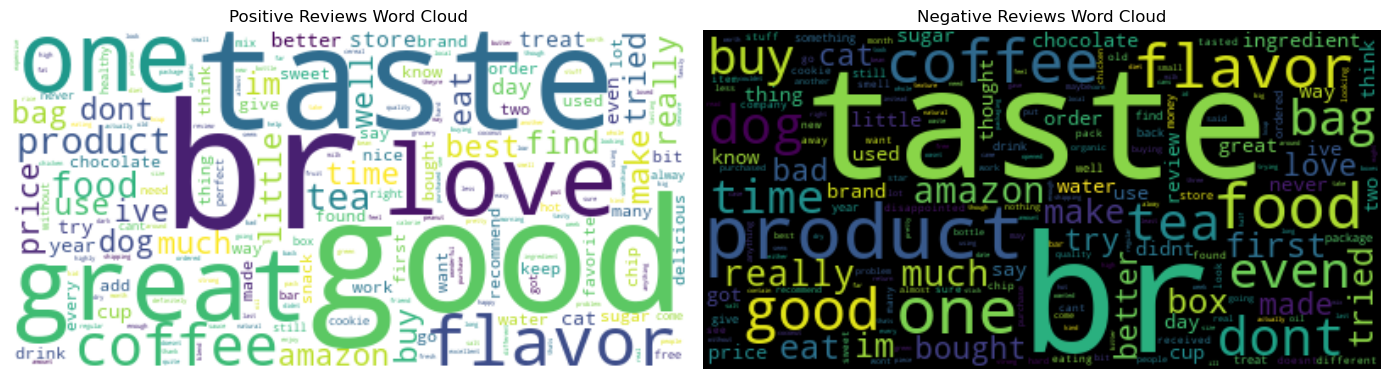

In [ ]:
positive_text = " ".join(df_balanced[df_balanced['Sentiment'] == 1]['Cleaned_Text'])
negative_text = " ".join(df_balanced[df_balanced['Sentiment'] == 0]['Cleaned_Text'])

wordcloud_positive = WordCloud(background_color='white', collocations=False).generate(positive_text)
wordcloud_negative = WordCloud(background_color='black', collocations=False).generate(negative_text)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Positive Reviews Word Cloud")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Negative Reviews Word Cloud")
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
df_balanced_sample = df_balanced[['Text', 'Sentiment']].sample(10, random_state=42)
df_balanced_sample['Sentiment_Label'] = df_balanced_sample['Sentiment'].map({1: 'Positive', 0: 'Negative'})

table = df_balanced_sample[['Text', 'Sentiment_Label']].values.tolist()
headers = ["Customer Review", "Predicted Sentiment"]
print("\n📋 Sample Customer Reviews with Sentiment:")
print(tabulate(table, headers=headers, tablefmt="grid", maxcolwidths=[50, None]))


📋 Sample Customer Reviews with Sentiment:
+----------------------------------------------------+-----------------------+
| Customer Review                                    | Predicted Sentiment   |
+====================================================+=======================+
| I have 4a/b/c hair and have read tons of materials | Positive              |
| about which products are best for our hair type. I |                       |
| thought that it was best to get away from          |                       |
| petroleum,  and mineral oil, which are the two     |                       |
| main ingredients in the Intense Scalp Nourishing   |                       |
| Balm. However, I gotta go with what I know and not |                       |
| what I read. This stuff works!! It totally coats   |                       |
| and seals in moisture for my porous, dry quickly   |                       |
| hair. It is VERY light and a little goes a long    |                       |
| way. No